In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
currencies = {'USD':1.36,
             'GBP':1.80,
             'HKD':0.17,
             'AUD':1.05,
             'CAD':1.06}

In [3]:
def salarytransformer(element):
    """ transform salary to the mean value of the range. not applicable for GBP because of pound sign"""
    listofvalues = element.replace(',','').split(' ')
    newlister = []
    for s in listofvalues:
        if "$" in s:
            s = s.strip("$")
            s = float(s)
            newlister.append(s)
            continue
        
        if s.isdigit():
            s = float(s)
            newlister.append(s)
            
    array = np.array(newlister)
    if listofvalues[-1] in "month":
        array*=12    # excludes bonus
    if listofvalues[-1] in "week":
        array*=52   #52 weeks
    if listofvalues[-1] in "day":
        array*=230   #5/7*365-30
    if listofvalues[-1] in "hour":
        array*=1840  #day*8
    
    if len(array) == 2:
        
        array = np.mean(array)
        return array
    
    elif len(array) == 1:
        return array[0]

    else:
        return None
    

In [7]:
def uksalarytransformer(element):
    
    newlister = []
    listofvalues = element.replace(',','').split(' ')
    for s in listofvalues:
        s = s[1:]
        if s.isdigit():
            s = float(s)
            newlister.append(s)
    array = np.array(newlister)
    
    if listofvalues[-1] in "month":
        array*=12    # excludes bonus
    if listofvalues[-1] in "day":
        array*=230   #5/7*365-30
    if listofvalues[-1] in "week":
        array*=52   #52 weeks    
    if listofvalues[-1] in "hour":
        array*=1840  #day*8
    
    if len(array) == 2:
        
        array = np.mean(array)
        return array
    
    elif len(array) == 1:
        if type(array[0]) == float:
            array = array[0]
            return array
    
    else:
        return None
    
    

In [8]:
dfsg = pd.read_pickle('dfsg.pkl')
dfsg['cleanedsalary'] = dfsg['salary'].map(salarytransformer)
dfsg['country'] = 'Singapore'
dfsg_withsalary = dfsg.loc[dfsg['cleanedsalary'].dropna().index]
dfsg_withsalary.shape

(44, 11)

In [9]:
dfuk = pd.read_pickle('dfuk.pkl')
dfuk['cleanedsalary'] = dfuk['salary'].map(uksalarytransformer)
dfuk['cleanedsalary'] = dfuk['cleanedsalary'].map(lambda x: x*currencies['GBP']) #convert to SGD
dfuk['country'] = 'United Kingdom'
dfuk_withsalary = dfuk.loc[dfuk['cleanedsalary'].dropna().index]
dfuk_withsalary.shape

(1914, 11)

In [10]:
dfus = pd.read_pickle('dfus.pkl')
dfus['cleanedsalary'] = dfus['salary'].map(salarytransformer)
dfus['cleanedsalary'] = dfus['cleanedsalary'].map(lambda x: x*currencies['USD']) #convert to SGD
dfus['country'] = 'United States'
dfus_withsalary = dfus.loc[dfus['cleanedsalary'].dropna().index]
dfus_withsalary.shape

(1964, 11)

In [11]:
dfca = pd.read_pickle('dfca.pkl')
dfca['cleanedsalary'] = dfca['salary'].map(salarytransformer)
dfca['cleanedsalary'] = dfca['cleanedsalary'].map(lambda x: x*currencies['CAD']) #convert to SGD
dfca['country'] = 'Canada'
dfca_withsalary = dfca.loc[dfca['cleanedsalary'].dropna().index]
dfca_withsalary.shape

(242, 11)

In [12]:
dfau = pd.read_pickle('dfau.pkl')
dfau['cleanedsalary'] = dfau['salary'].map(salarytransformer)
dfau['cleanedsalary'] = dfau['cleanedsalary'].map(lambda x: x*currencies['AUD']) #convert to SGD
dfau['country'] = 'Australia'
dfau_withsalary = dfau.loc[dfau['cleanedsalary'].dropna().index]
dfau_withsalary.shape

(321, 11)

In [13]:
dfhk = pd.read_pickle('dfhk.pkl')
dfhk['cleanedsalary'] = dfhk['salary'].map(salarytransformer)
dfhk['cleanedsalary'] = dfhk['cleanedsalary'].map(lambda x: x*currencies['HKD']) #convert to SGD
dfhk['country'] = 'Hong Kong'
dfhk_withsalary = dfhk.loc[dfhk['cleanedsalary'].dropna().index]
dfhk_withsalary.shape

(17, 11)

In [14]:
dfconsolidated = pd.concat([dfsg, dfuk, dfus, dfau, dfca, dfhk])

In [343]:
dfconsolidated.head()

,city,company,description,experience,location,reviews,salary,stars,title,cleanedsalary,country
0,Singapore,Libbler,"Good understanding of investment and quant, ma...",NA,Singapore,NA,NA,NA,Research Data Manager,NaN,Singapore
1,Singapore,Procter & Gamble,"Scope includes acquiring, cleaning, formatting...",NA,Singapore,"3,713 reviews",NA,52.2,Research & Development - Data Transformation S...,NaN,Singapore
2,Singapore,EkkBaz.com,"Selecting features, building and optimizing cl...",NA,Ang Mo Kio,NA,"$1,000 - $2,000 a month",NA,Data Scientist Intern,18000.0,Singapore
3,Singapore,IBM,Familiar with at least one Machine Learning li...,NA,Singapore,"18,106 reviews",NA,51.0,Research Data Scientist (IBM Singapore Lab),NaN,Singapore
4,Singapore,GIC Investment,Data & Analytics Department. Experience buildi...,NA,Tanjong Pagar,NA,NA,NA,"AVP/VP, Machine Learning Engineer",NaN,Singapore


In [16]:
dfconsolidated_withsalary = pd.concat([dfsg_withsalary, dfuk_withsalary,dfus_withsalary,dfau_withsalary,dfca_withsalary, dfhk_withsalary])

In [17]:
df = dfconsolidated.drop_duplicates(subset=['company','cleanedsalary','location','title','city'])
dfc = dfconsolidated_withsalary.drop_duplicates(subset=['company','cleanedsalary','location','title','city'])

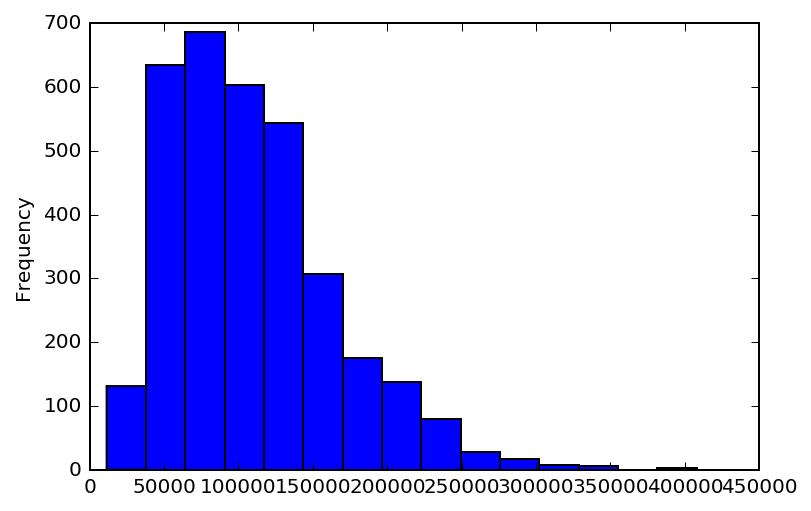

In [18]:
dfc['cleanedsalary'].plot.hist(bins=15)

In [19]:
import seaborn as sns

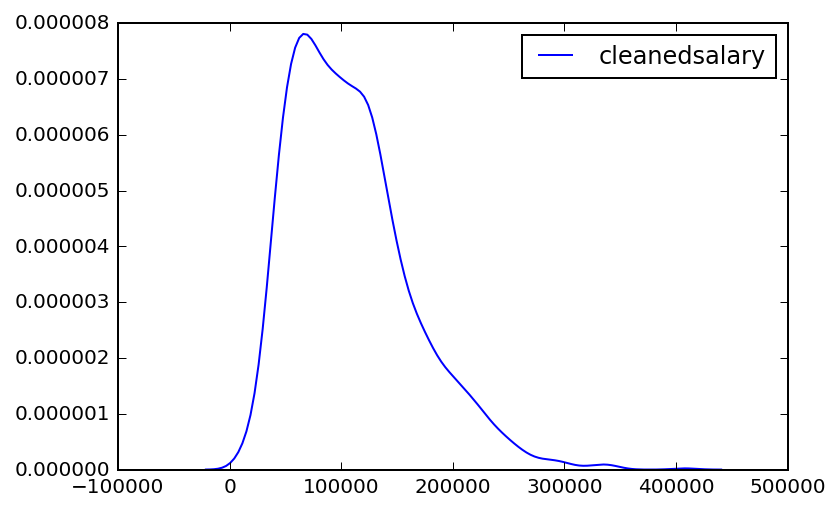

In [20]:
sns.kdeplot(dfc['cleanedsalary'])

In [21]:
print dfc.shape
dfcn = dfc[dfc['city'] != '']    # made a mistake in scraping
print dfcn.shape

(3354, 11)
(3310, 11)


In [22]:
dfcn.head()

,city,company,description,experience,location,reviews,salary,stars,title,cleanedsalary,country
2,Singapore,EkkBaz.com,"Selecting features, building and optimizing cl...",NA,Ang Mo Kio,NA,"$1,000 - $2,000 a month",NA,Data Scientist Intern,18000.0,Singapore
16,Singapore,UMeKang,"Experienced with Predictive Analytics, advance...",NA,Singapore,NA,"$9,000 - $11,000 a month",NA,Data Scientist,120000.0,Singapore
35,Singapore,Cresco Data Pte Ltd,Data Scientist Duties:. Providing insights bas...,NA,Tanjong Pagar,NA,"$3,500 - $4,500 a month",NA,Data Scientist,48000.0,Singapore
41,Singapore,iKas International (Asia) Pte Ltd,Have extensive experience in data analytics. U...,NA,Singapore,NA,"$7,000 - $9,000 a month",NA,Data Scientist,96000.0,Singapore
58,Singapore,TSA Solutions,Data Scientist - Summary*. Minimum 2 year expe...,NA,Pasir Panjang,NA,"$4,200 a month",NA,Data Scientist,50400.0,Singapore


#### Title processing.

One-hot encoded if certain keywords are in the title. Self explantory

In [23]:
def isdatascientist(element):
    if "data scientist" in element.lower():
        return 1
    else: return 0
    
def isdataanalyst(element):
    if "analyst" in element.lower() and "data" in element.lower():
        return 1
    else: return 0
    
def isengineer(element):
    if "engineer" in element.lower() and "data" in element.lower():
            return 1
    else: return 0
    
def isbusinessanalyst(element):
    if "analyst" in element.lower() and "business" in element.lower():
        return 1
    else: return 0
    
def isintern(element):
    if "intern" in element.lower():
        return 1
    else: return 0
    
def isboss(element):
    bosses = ['head','chief','boss','manager','director','lead','senior']
    for boss in bosses:
        if boss in element.lower():
            return 1
        else:
            continue
    return 0
    

In [24]:
dfcn['data_scientist'] = dfcn['title'].map(isdatascientist)
dfcn['data_analyst'] = dfcn['title'].map(isdataanalyst)
dfcn['business_analyst'] = dfcn['title'].map(isbusinessanalyst)
dfcn['data_engineer'] = dfcn['title'].map(isengineer)
dfcn['intern'] = dfcn['title'].map(isintern)
dfcn['boss'] = dfcn['title'].map(isboss)

/Users/melvinperera/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/melvinperera/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/melvinperera/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

#### Company processing.
Using a list of Fortune500 companies in 2017, I one-hot encoded them to label the companies.

In [25]:
f500 = pd.read_csv('Fortune 500 Global List 2017_Someka V2.csv',skiprows=6)
f500list = []
for f in f500['Company Name'].dropna().values:
    try:
        f500list.append(unicode(f))
    except:
        pass

In [26]:
f500list

[u'Walmart',
 u'State Grid',
 u'Sinopec Group',
 u'China National Petroleum',
 u'Toyota Motor',
 u'Volkswagen',
 u'Royal Dutch Shell',
 u'Berkshire Hathaway',
 u'Apple',
 u'Exxon Mobil',
 u'McKesson',
 u'BP',
 u'UnitedHealth Group',
 u'CVS Health',
 u'Samsung Electronics',
 u'Glencore',
 u'Daimler',
 u'General Motors',
 u'AT&T',
 u'EXOR Group',
 u'Ford Motor',
 u'Industrial & Commer. Bank of China',
 u'AmerisourceBergen',
 u'China State Construction Engineering',
 u'AXA',
 u'Amazon.com',
 u'Hon Hai Precision Industry',
 u'China Construction Bank',
 u'Honda Motor',
 u'Total',
 u'General Electric',
 u'Verizon',
 u'Japan Post Holdings',
 u'Allianz',
 u'Cardinal Health',
 u'Costco',
 u'Walgreens',
 u'Agricultural Bank of China',
 u'Ping An Insurance',
 u'Kroger',
 u'SAIC Motor',
 u'Bank of China',
 u'BNP Paribas',
 u'Nissan Motor',
 u'Chevron',
 u'Fannie Mae',
 u'China Mobile Communications',
 u'JP Morgan Chase',
 u'Legal & General Group',
 u'Nippon Tel. & Tel.',
 u'China Life Insurance',


In [27]:
def isf500(element):
    if any(element in x for x in f500list):
        return 1
    else:
        return 0
    
dfcn['f500'] = dfcn['company'].map(isf500)

/Users/melvinperera/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [28]:
dfcn['f500'].value_counts()

0    3240
1      70
Name: f500, dtype: int64

It is quite unbalanced... but I'll just leave it in for now as I think that it would have a pretty decent predictive power.

---

Dropping unneccesary columns.

I have decided to drop experience as it is very sparse.
I have dropped location too as it has too many unique locations. I will use city as the location identifier instead. 

---

#### Reviews and Stars Processing
I am going to bin the stars and reviews columns into binary ones, whether it is being reviewed and starred or if it is not. With that, I can drop the reviews and stars row.

In [30]:
dfnewnew = dfcn.drop(['salary','experience','location'], axis=1)

In [31]:
dfnewnew.reviews.value_counts()

NA                1950
16 reviews          97
33 reviews          84
2 reviews           82
158 reviews         63
4 reviews           57
3 reviews           55
5 reviews           48
10 reviews          41
9 reviews           39
6 reviews           38
7 reviews           36
29 reviews          27
13 reviews          25
1,842 reviews       24
8 reviews           22
15 reviews          21
20 reviews          21
672 reviews         19
14 reviews          17
905 reviews         16
18 reviews          16
11 reviews          15
156 reviews         13
36 reviews          12
141 reviews         12
39 reviews          12
85 reviews          11
12 reviews          10
26 reviews           9
                  ... 
834 reviews          1
5,425 reviews        1
221 reviews          1
90 reviews           1
4,723 reviews        1
364 reviews          1
52 reviews           1
57 reviews           1
94 reviews           1
89 reviews           1
485 reviews          1
524 reviews          1
2,850 revie

In [32]:
dfnewnew.loc[(dfnewnew.stars == 'NA') & (dfnewnew.reviews == 'NA')].shape # no reviews = no stars

(1950, 15)

In [33]:
def reviewstar(row):
    "if there are reviews and stars, 1. else: 0"
    if row in 'NA':
        return 0
    else:
        return 1

In [34]:
dfnewnew['reviewstar'] = dfnewnew['reviews'].map(reviewstar)
dfnewnewnew = dfnewnew.drop(['reviews','stars'], axis=1)

In [330]:
dfnewnewnew.groupby('country')['cleanedsalary'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Australia,209.0,120478.718182,44200.941686,27300.000,94500.00,120750.0,144856.425,265650.0
Canada,190.0,82135.195147,32373.494670,27305.600,59902.19,79500.0,100111.700,233200.0
Hong Kong,9.0,92026.666667,57973.738882,27540.000,45900.00,86700.0,122400.000,214200.0
Singapore,42.0,54374.285714,27756.285436,12000.000,42000.00,48000.0,60000.000,144000.0
United Kingdom,1326.0,86217.360407,42342.789056,11385.000,56925.00,74520.0,103500.000,279450.0
United States,1534.0,133148.534589,57440.315359,15095.728,95200.00,126480.0,163200.000,408000.0


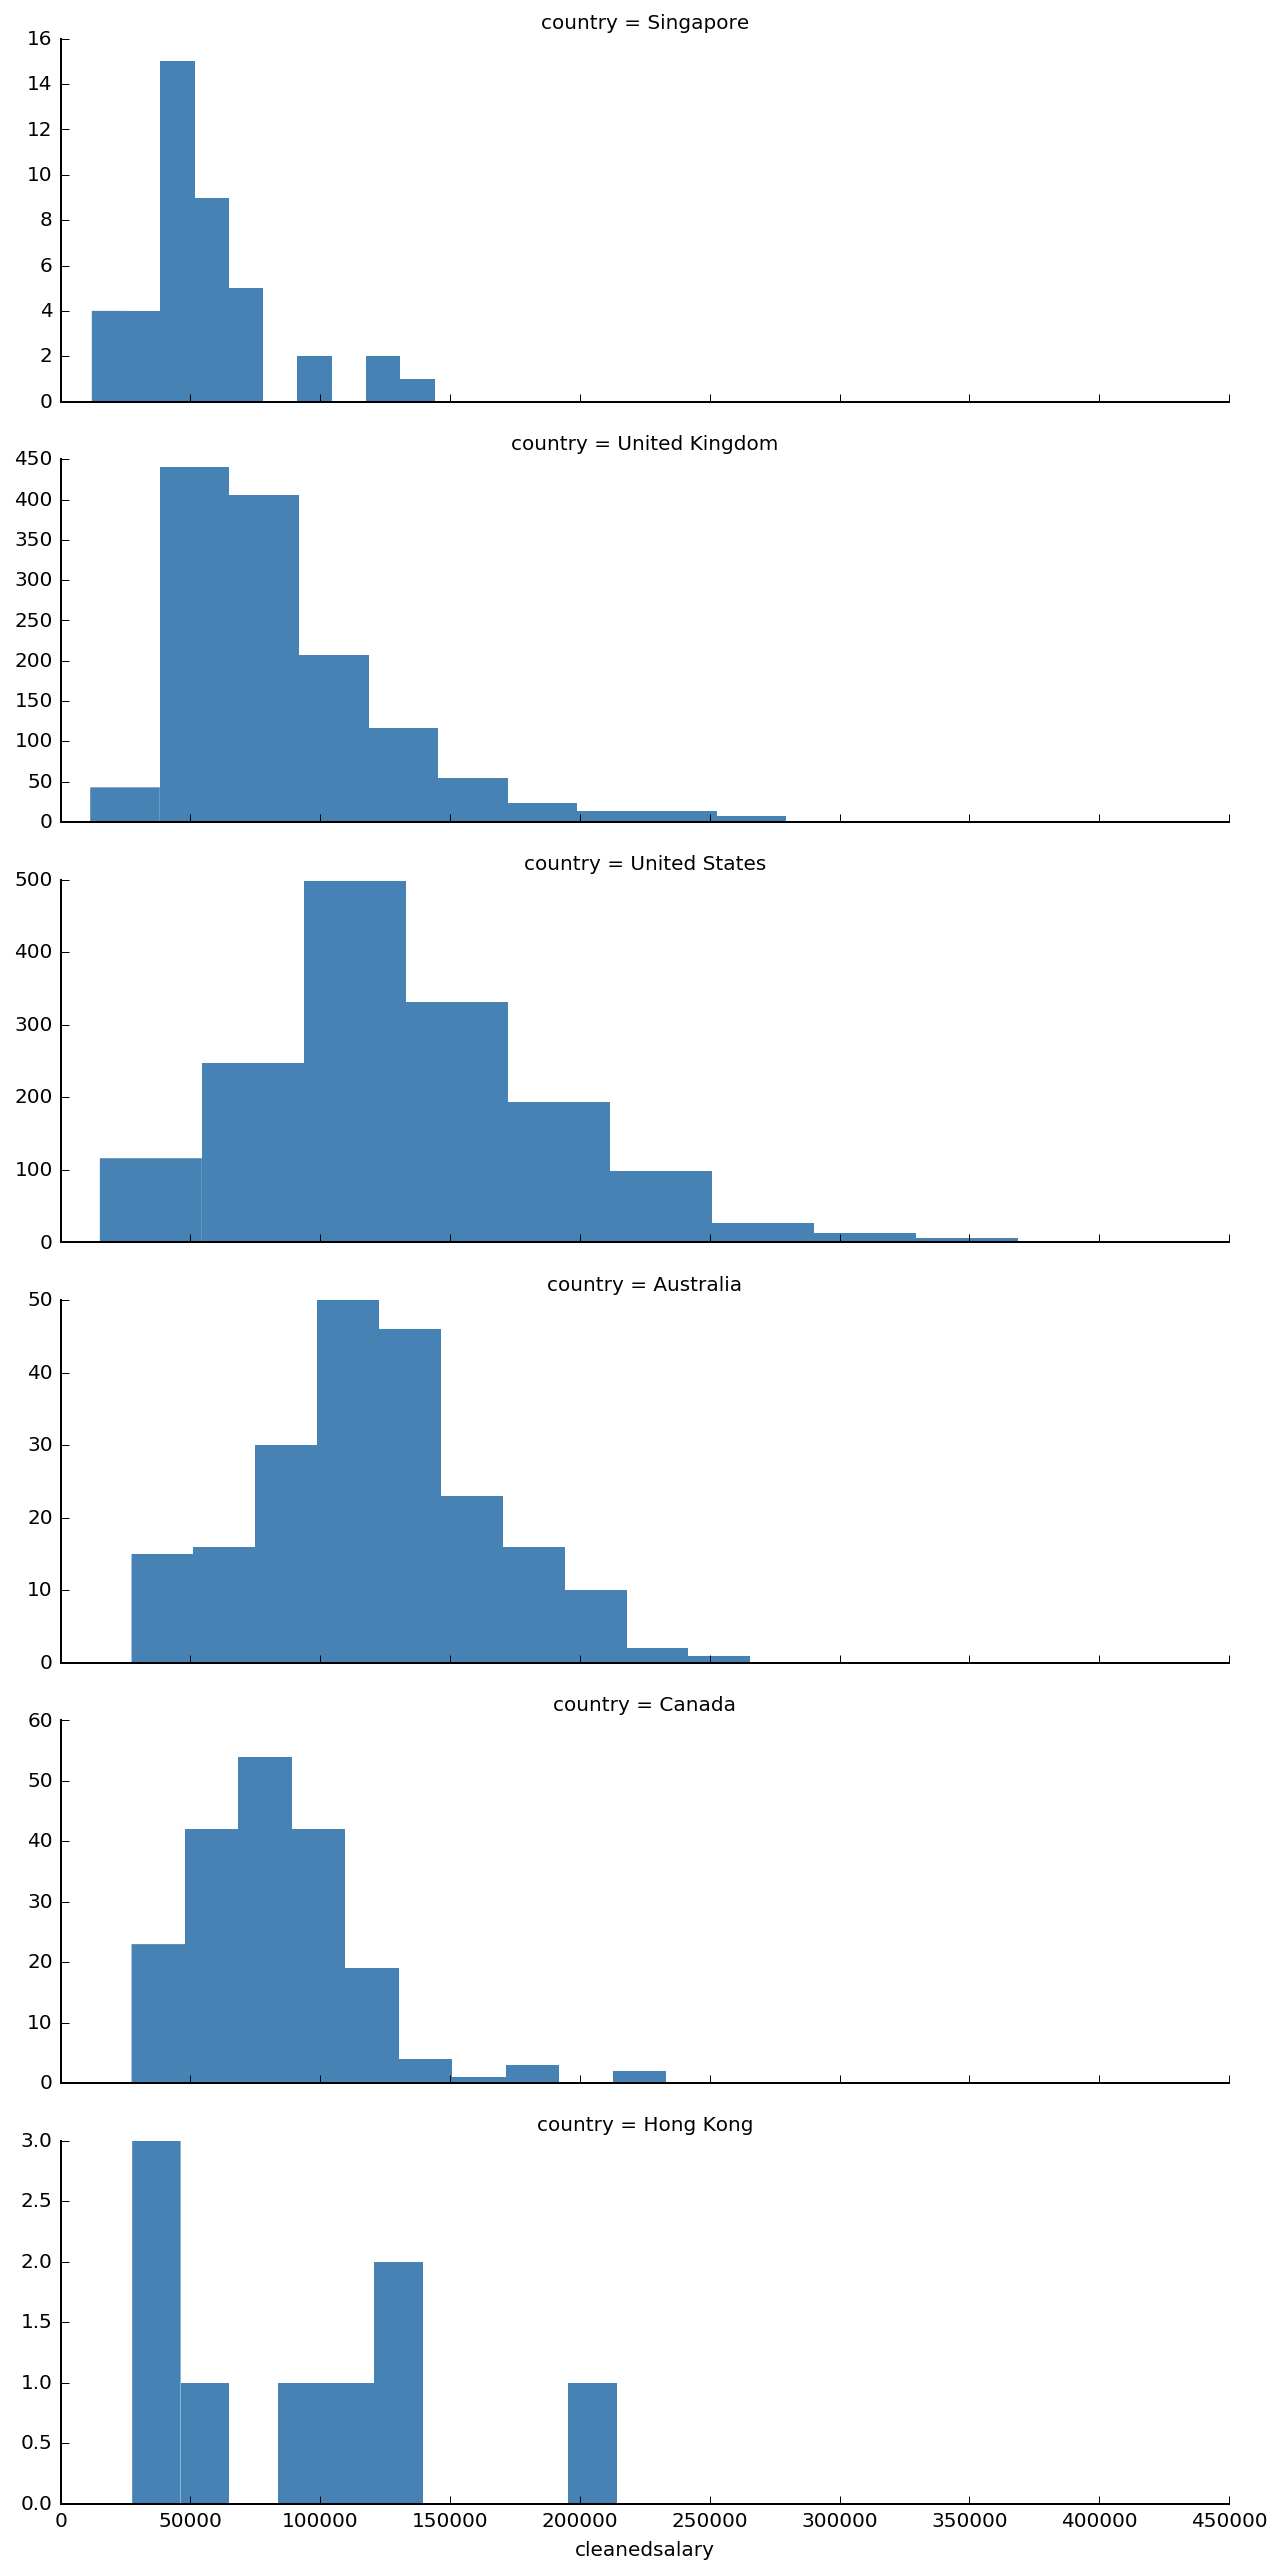

In [342]:
g = sns.FacetGrid(dfnewnewnew,row='country',sharey=False, aspect=3)
g.map(plt.hist, "cleanedsalary", color="steelblue", bins=10, lw=0)

In [35]:
dfnewnewnew['country'].value_counts()

United States     1534
United Kingdom    1326
Australia          209
Canada             190
Singapore           42
Hong Kong            9
Name: country, dtype: int64

---

Super unbalanced dataset. I decided to drop everything aside from the UK and USA to analyse to create a more balanced dataset.

In [44]:
dfnew = dfnewnewnew.loc[(dfcn['country'] == 'United Kingdom') | (dfcn['country'] == 'United States')]
dfnew['country'].value_counts()

United States     1534
United Kingdom    1326
Name: country, dtype: int64

In [45]:
cleaned = dfnew.reset_index(drop=True)

In [46]:
cleaned.head()

,city,company,description,title,cleanedsalary,country,data_scientist,data_analyst,business_analyst,data_engineer,intern,boss,f500,reviewstar
0,London,La Fosse Associates,"Machine learning, data science, big data. Prob...",Head of Analytics,135000.0,United Kingdom,0,0,0,0,0,1,0,0
1,London,Aspire Data Recruitment,Hands-on experience on statistical modelling/ ...,Head of Predictive Analytics,211500.0,United Kingdom,0,0,0,0,0,1,0,0
2,London,Data Idols,Commercial knowledge of machine learning techn...,Data Scientist,130500.0,United Kingdom,1,0,0,0,0,0,0,0
3,London,Tessella Ltd,Data Scientist / Software Developer. Using dat...,Data Scientist / Software Developer,54000.0,United Kingdom,1,0,0,0,0,0,0,0
4,London,Tech Mavens,"PhD with research, publications related to mac...",Machine Learning researcher,144000.0,United Kingdom,0,0,0,0,0,0,0,0


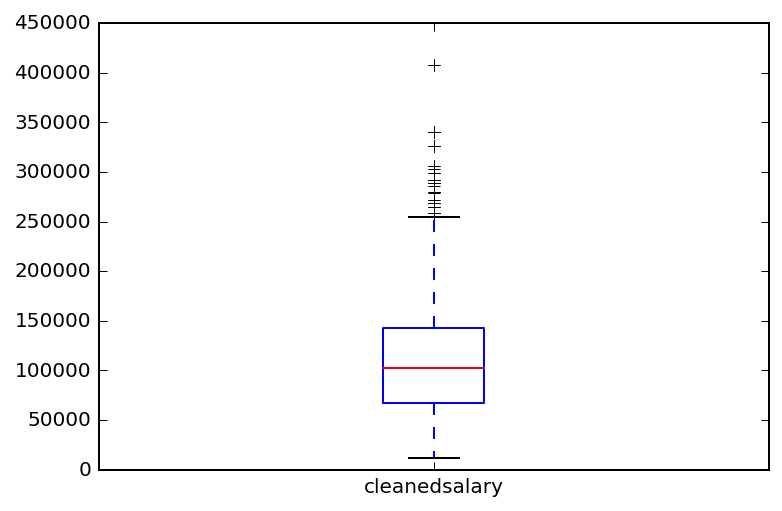

In [47]:
cleaned['cleanedsalary'].plot.box()

Remove outliers with salary above 250000

In [48]:
print cleaned.shape
cleaner = cleaned[cleaned['cleanedsalary'] <= 250000]
print cleaner.shape

(2860, 14)
(2803, 14)


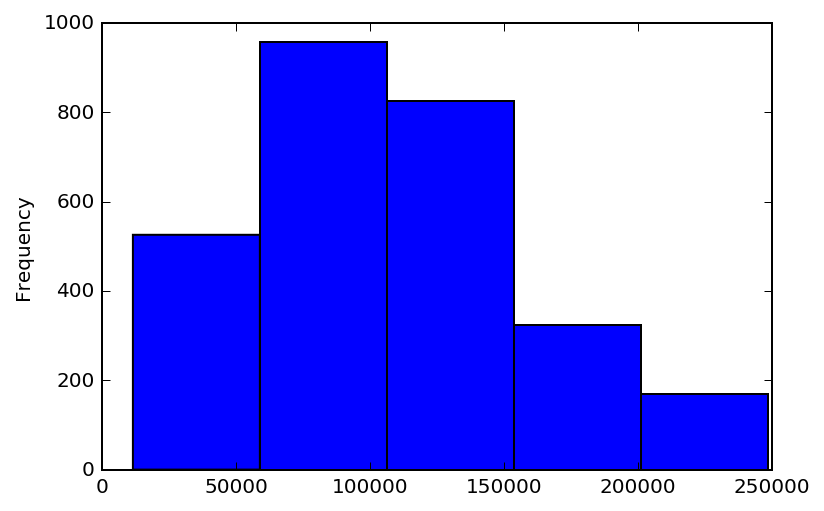

In [49]:
cleaner['cleanedsalary'].plot.hist(bins=5)

In [50]:
bins = [0, 60000, 100000, 150000, 250000]
groupnames = [1,2,3,4]
categories = pd.cut(cleaner['cleanedsalary'], bins, labels=groupnames)
cleaner['binnedsalary'] = categories

/Users/melvinperera/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [51]:
cleaner['binnedsalary'].value_counts()

2    867
3    862
4    542
1    532
Name: binnedsalary, dtype: int64

In [52]:
cleaner.head()

,city,company,description,title,cleanedsalary,country,data_scientist,data_analyst,business_analyst,data_engineer,intern,boss,f500,reviewstar,binnedsalary
0,London,La Fosse Associates,"Machine learning, data science, big data. Prob...",Head of Analytics,135000.0,United Kingdom,0,0,0,0,0,1,0,0,3
1,London,Aspire Data Recruitment,Hands-on experience on statistical modelling/ ...,Head of Predictive Analytics,211500.0,United Kingdom,0,0,0,0,0,1,0,0,4
2,London,Data Idols,Commercial knowledge of machine learning techn...,Data Scientist,130500.0,United Kingdom,1,0,0,0,0,0,0,0,3
3,London,Tessella Ltd,Data Scientist / Software Developer. Using dat...,Data Scientist / Software Developer,54000.0,United Kingdom,1,0,0,0,0,0,0,0,1
4,London,Tech Mavens,"PhD with research, publications related to mac...",Machine Learning researcher,144000.0,United Kingdom,0,0,0,0,0,0,0,0,3


In [53]:
cleaner['city'].unique()

array(['London', 'Manchester', 'Birmingham', 'Liverpool', 'Milton Keynes',
       'Bristol', 'Cambridge', 'Oxford', 'Leeds', 'Brighton',
       'Southampton', 'Houston', 'San Francisco', 'Mountain View',
       'Palo Alto', 'Los Angeles', 'New York', 'San Jose', 'Boston',
       'Chicago', 'Seattle', 'Austin', 'Dallas', 'San Diego', 'Denver',
       'Portland', 'St Louis', 'Philadelphia', 'Cincinnati', 'Atlanta',
       'Berkeley', 'Detroit', 'Miami'], dtype=object)

In [54]:
from sklearn.preprocessing import LabelEncoder   # label encoded the cities
le = LabelEncoder()
le.fit(cleaner['city'].unique())
print le.classes_
cleaner['citycode'] = le.transform(cleaner['city']) 

['Atlanta' 'Austin' 'Berkeley' 'Birmingham' 'Boston' 'Brighton' 'Bristol'
 'Cambridge' 'Chicago' 'Cincinnati' 'Dallas' 'Denver' 'Detroit' 'Houston'
 'Leeds' 'Liverpool' 'London' 'Los Angeles' 'Manchester' 'Miami'
 'Milton Keynes' 'Mountain View' 'New York' 'Oxford' 'Palo Alto'
 'Philadelphia' 'Portland' 'San Diego' 'San Francisco' 'San Jose' 'Seattle'
 'Southampton' 'St Louis']


/Users/melvinperera/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [55]:
cleaner.head()

,city,company,description,title,cleanedsalary,country,data_scientist,data_analyst,business_analyst,data_engineer,intern,boss,f500,reviewstar,binnedsalary,citycode
0,London,La Fosse Associates,"Machine learning, data science, big data. Prob...",Head of Analytics,135000.0,United Kingdom,0,0,0,0,0,1,0,0,3,16
1,London,Aspire Data Recruitment,Hands-on experience on statistical modelling/ ...,Head of Predictive Analytics,211500.0,United Kingdom,0,0,0,0,0,1,0,0,4,16
2,London,Data Idols,Commercial knowledge of machine learning techn...,Data Scientist,130500.0,United Kingdom,1,0,0,0,0,0,0,0,3,16
3,London,Tessella Ltd,Data Scientist / Software Developer. Using dat...,Data Scientist / Software Developer,54000.0,United Kingdom,1,0,0,0,0,0,0,0,1,16
4,London,Tech Mavens,"PhD with research, publications related to mac...",Machine Learning researcher,144000.0,United Kingdom,0,0,0,0,0,0,0,0,3,16


Now it's time to push the dataframe in for prediction. I decided to drop 'country' as it is binary and correlated to location already.

In [205]:
X = cleaner.drop(['cleanedsalary','title','company','country','city','binnedsalary'], axis=1)
yreg = cleaner['cleanedsalary']
ycat = cleaner['binnedsalary']
X.head()

,description,data_scientist,data_analyst,business_analyst,data_engineer,intern,boss,f500,reviewstar,citycode
0,"Machine learning, data science, big data. Prob...",0,0,0,0,0,1,0,0,16
1,Hands-on experience on statistical modelling/ ...,0,0,0,0,0,1,0,0,16
2,Commercial knowledge of machine learning techn...,1,0,0,0,0,0,0,0,16
3,Data Scientist / Software Developer. Using dat...,1,0,0,0,0,0,0,0,16
4,"PhD with research, publications related to mac...",0,0,0,0,0,0,0,0,16


#### Description cleaning

Process: regex to clear punctuation, followed by a stopword remover, porterstemmer and a countvectorizer.

In [206]:
import re
regex = re.compile('[^a-zA-Z\'-] ')    
#First parameter is the replacement, second parameter is your input string
regex.sub(' ','abc-ed' )   #testing regex


'abc-ed'

In [207]:
X['description'] = X['description'].map(lambda x:x.replace(',',' ').replace('....',' ').strip().split(' '))

In [208]:
def descriptionclean(x):
    l = []
    for s in x:
        l.append((regex.sub(' ',s)).strip(' '))
    return l
        

In [209]:
X['description'] = X['description'].map(descriptionclean)#.map(lambda x:' '.join(x).strip())

In [210]:
from nltk.corpus import stopwords
nltk_stops = stopwords.words()
print len(nltk_stops)
nltk_stops.append('read')
nltk_stops.append('more')
print len(nltk_stops)

3136
3138


In [211]:
def removestop(x):
    return [word for word in x if word not in nltk_stops]

In [212]:
X['description'] = X['description'].map(removestop)

In [213]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
X['description'] = X['description'].map(lambda x:[stemmer.stem(word) for word in x])
X['description'].map(lambda x:[word for word in x if word.isalpha()])

0       [machin, learn, data, scienc, big, probabl, wo...
1       [experi, statist, machin, learn, Be, respons, ...
2       [commerci, knowledg, machin, learn, our, londo...
3       [data, scientist, softwar, use, data, scienc, ...
4       [phd, research, public, relat, machin, learn, ...
5       [send, CV, call, confidenti, discuss, nlp, res...
6       [ensur, deliveri, complet, data, load, custom,...
7       [data, scientist, behaviour, analysi, recommen...
8       [data, scientist, experi, would, highli, thi, ...
10      [senior, data, scientist, If, interest, data, ...
11      [data, scientist, R, python, numpi, scipi, mat...
12      [data, scientist, lab, strong, background, sta...
13      [head, data, scienc, lead, data, scientist, da...
14      [build, team, world, class, data, deploy, mach...
15      [thi, applic, broad, rang, data, scienc, techn...
16      [R, python, sql, spark, sa, hadoop, scala, mon...
17      [thi, well, respect, custom, analyt, consult, ...
18      [with,

In [214]:
X['description'] = X['description'].map(lambda x: " ".join(x).strip())

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_trainr, y_testr = train_test_split(X, yreg, test_size=0.33, random_state=42)

In [216]:
X_train, X_test, y_trainc, y_testc = train_test_split(X, ycat, test_size=0.33, random_state=42)

In [217]:
from sklearn.feature_extraction.text import CountVectorizer
cvt      =  CountVectorizer(strip_accents='unicode', ngram_range=(1,2), stop_words = 'english', min_df=50)
X_all    =  cvt.fit_transform(X_train['description'])
columns  =  np.array(cvt.get_feature_names())          # ndarray (for indexing below)

# note this is a large sparse matrix. 
#    - rows are tweets, columns are words 
X_all

<1878x94 sparse matrix of type '<type 'numpy.int64'>'
	with 12678 stored elements in Compressed Sparse Row format>

In [218]:
print X_all.shape
print "Requires {} ints to do a .toarray()!".format(X_all.shape[0] * X_all.shape[1])


(1878, 94)
Requires 176532 ints to do a .toarray()!


In [219]:
def get_freq_words(sparse_counts, columns):
    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting
    word_counts = np.asarray(X_all.sum(axis=0)).reshape(-1)

    # argsort() returns smallest first, so we reverse the result
    largest_count_indices = word_counts.argsort()[::-1]

    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words


freq_words = get_freq_words(X_all, columns)
freq_words[:20]

data              2378
analyst            664
analyt             629
learn              496
machin             455
engin              417
experi             361
busi               336
machin learn       333
work               289
develop            285
scientist          284
team               254
data scientist     243
intellig           232
manag              208
look               189
use                187
data analyt        180
senior             176
dtype: int64

In [220]:
docs = pd.DataFrame(X_all.todense(), columns=columns)
X_trainfull = pd.concat([docs,X_train.drop('description',axis=1).reset_index()], axis=1, ignore_index=True)

In [221]:
docs.head()

,abil,advanc,algorithm,analys,analysi,analyst,analyt,analyt data,analytics,analyz,...,technic,technolog,test,thi,tool,understand,use,web,work,year
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion


In [151]:
class ItemSelector(BaseEstimator, TransformerMixin):

    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

class RemoveDescription(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, df, y=None):
        """The workhorse of this feature extractor"""
        return df.drop('description', axis=1).reset_index(drop=True)

    def fit(self, df, y=None):
        """Returns `self` unless something different happens in train and test"""
        return self
    

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [153]:
tester = Pipeline([
    ("union", FeatureUnion(
        transformer_list=[
            ("description", Pipeline([
                ("selector", ItemSelector(column="description")),
                ("countvec", CountVectorizer(strip_accents='unicode', ngram_range=(1,2),
                                             stop_words = 'english', min_df=50))
            ])), ("removedes", RemoveDescription())
        ]))])

tester.fit_transform(X_train)

<1878x103 sparse matrix of type '<type 'numpy.int64'>'
	with 16392 stored elements in Compressed Sparse Row format>

### Random Forest

In [230]:

pipeline = Pipeline([
    ("union", FeatureUnion(
        transformer_list=[
            ("description", Pipeline([
                ("selector", ItemSelector(column="description")),
                ("countvec", CountVectorizer(strip_accents='unicode', ngram_range=(1,2),
                                             stop_words = 'english', min_df=50))
            ])), ("removedes", RemoveDescription())
        ])),
    ("classifier", RandomForestClassifier(n_jobs=-1))
])

gs_params = {
    'classifier__n_estimators':[10,30,50,100],
    'classifier__max_features':['sqrt','log2'],
    'classifier__bootstrap' : [True, False]
}
#model = pipeline.fit(X_train, y_trainc.tolist())
cv = GridSearchCV(pipeline, gs_params, cv=5)
cv.fit(X_train, y_trainc.tolist())
#predictions = model.predict(X_test)
#cv.score(X_test, y_testc)
predictions = cv.predict(X_test)
print classification_report(y_testc.tolist(), predictions)

             precision    recall  f1-score   support

          1       0.60      0.52      0.56       178
          2       0.47      0.57      0.51       283
          3       0.49      0.50      0.49       283
          4       0.65      0.50      0.57       181

avg / total       0.54      0.52      0.53       925



Classification report for a random forest classifier. It's not too bad considering that the baseline is 0.301.

In [158]:
baseline = max(ycat.value_counts().values)/float(len(ycat))
print baseline

0.309311452016


In [155]:
be = cv.best_estimator_ 
be.steps[1][1].feature_importances_.shape

(103,)

In [157]:
be = cv.best_estimator_ 

fi = pd.DataFrame({
        'feature':docs.columns.append(X_train.drop('description',axis=1).columns),
        'importance':be.steps[1][1].feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi[:20]   # Feature importance

,feature,importance
102,citycode,0.090246
22,data,0.042272
99,boss,0.024670
101,reviewstar,0.024618
5,analyst,0.023606
6,analyt,0.023207
34,experi,0.017793
45,learn,0.017249
92,work,0.016843
31,engin,0.016340


Nothing too surprising here. Usual suspects (city, data, boss)

### Using SVD

In [179]:
from sklearn.decomposition import TruncatedSVD

In [180]:

pipeline = Pipeline([
    ("union", FeatureUnion(
        transformer_list=[
            ("description", Pipeline([
                ("selector", ItemSelector(column="description")),
                ("countvec", CountVectorizer(strip_accents='unicode', ngram_range=(1,2),
                                             stop_words = 'english', min_df=50))
            ])), ("removedes", RemoveDescription())
        ])),('SVD',TruncatedSVD()),
    ("classifier", RandomForestClassifier(n_jobs=-1))
])

gs_params = {
    'SVD__n_components':[5,10,15],
    'classifier__n_estimators':[10,30,50,100],
    'classifier__max_features':['sqrt','log2'],
    'classifier__bootstrap' : [True, False]
}
#model = pipeline.fit(X_train, y_trainc.tolist())
cv = GridSearchCV(pipeline, gs_params, cv=5)
cv.fit(X_train, y_trainc.tolist())
#predictions = model.predict(X_test)
#cv.score(X_test, y_testc)
predictions = cv.predict(X_test)
print classification_report(y_testc.tolist(), predictions)

             precision    recall  f1-score   support

          1       0.51      0.46      0.48       178
          2       0.47      0.55      0.51       283
          3       0.46      0.45      0.45       283
          4       0.50      0.44      0.47       181

avg / total       0.48      0.48      0.48       925



SVD makes it worse....

In [223]:
class DenseTransformer(BaseEstimator,TransformerMixin):
    """ Transformer to convert a sparse to a dense matrix"""
    def __init__(self):
        pass

    def transform(self, X, y=None):
        return X.todense()

    def fit(self, X, y=None):
        return self

### GradientBoost

In [229]:
pipeline2 = Pipeline([
    ("union", FeatureUnion(
        transformer_list=[
            ("description", Pipeline([
                ("selector", ItemSelector(column="description")),
                ("countvec", CountVectorizer(strip_accents='unicode', ngram_range=(1,2),
                                             stop_words = 'english', min_df=50)),("todense", DenseTransformer())
            ])), ("removedes", RemoveDescription())
        ])),
    ("classifier", GradientBoostingClassifier())    #gradient boost
])

gs_params = {
    'classifier__n_estimators':[30,50,100],
    'classifier__learning_rate':[0.05,0.1],
    'classifier__max_depth' : [3,5,7]    
}

#model = pipeline.fit(X_train, y_trainc.tolist())
cv2 = GridSearchCV(pipeline2, gs_params, cv=5)
cv2.fit(X_train, y_trainc.tolist())
#predictions = model.predict(X_test)
#cv.score(X_test, y_testc)
predictions2 = cv2.predict(X_test)
print classification_report(y_testc.tolist(), predictions2)

             precision    recall  f1-score   support

          1       0.62      0.49      0.55       178
          2       0.51      0.59      0.55       283
          3       0.49      0.53      0.51       283
          4       0.60      0.50      0.55       181

avg / total       0.54      0.54      0.54       925



Gradient boost performs marginally better than random forests

### Adaboost

In [228]:
from sklearn.ensemble import AdaBoostClassifier
pipeline3 = Pipeline([
    ("union", FeatureUnion(
        transformer_list=[
            ("description", Pipeline([
                ("selector", ItemSelector(column="description")),
                ("countvec", CountVectorizer(strip_accents='unicode', ngram_range=(1,2),
                                             stop_words = 'english', min_df=50)),("todense", DenseTransformer())
            ])), ("removedes", RemoveDescription())
        ])),
    ("classifier", AdaBoostClassifier())
])

gs_params = {
    'classifier__n_estimators':[30,50,100],
    'classifier__learning_rate':[0.01,0.05,0.1],   
}

#model = pipeline.fit(X_train, y_trainc.tolist())
cv3 = GridSearchCV(pipeline3, gs_params, cv=5)
cv3.fit(X_train, y_trainc.tolist())
#predictions = model.predict(X_test)
#cv.score(X_test, y_testc)
predictions3 = cv3.predict(X_test)
print classification_report(y_testc.tolist(), predictions3)

             precision    recall  f1-score   support

          1       0.82      0.08      0.14       178
          2       0.38      0.68      0.48       283
          3       0.39      0.48      0.43       283
          4       0.62      0.16      0.25       181

avg / total       0.51      0.40      0.36       925



In [ ]:
Doing Adaboost on Randomforest.

Adaboost did not do too well.... 

#### Trying a regressor

In [159]:
from sklearn.ensemble import RandomForestRegressor
pipeliner = Pipeline([
    ("union", FeatureUnion(
        transformer_list=[
            ("description", Pipeline([
                ("selector", ItemSelector(column="description")),
                ("countvec", CountVectorizer(strip_accents='unicode', ngram_range=(1,2),
                                             stop_words = 'english', min_df=50))
            ])), ("removedes", RemoveDescription())
        ])),
    ("regressor", RandomForestRegressor(n_jobs=-1))
])

gs_params = {
    'regressor__n_estimators':[10,30,50,100],
    'regressor__max_features':['sqrt','log2'],
    'regressor__bootstrap' : [True, False]
}
#model = pipeline.fit(X_train, y_trainc.tolist())
cvr = GridSearchCV(pipeliner, gs_params, cv=5)
cvr.fit(X_train, y_trainr.tolist())
cvr.score(X_test, y_testr.tolist())

0.46493156312002482

The regressor gives an R^2 score of 0.465. Its not too good but better than nothing I suppose.

In [ ]:
X = cleaner.drop(['cleanedsalary','title','company','country','city','binnedsalary'], axis=1)
yreg = cleaner['cleanedsalary']
ycat = cleaner['binnedsalary']
X.head()

### Question 2

#### Now I will create a classification model to predict data scientists.

Great news that I've already pre-processed the dataset in question 1.

In [303]:
cleaner.head()

,city,company,description,title,cleanedsalary,country,data_scientist,data_analyst,business_analyst,data_engineer,intern,boss,f500,reviewstar,binnedsalary,citycode
0,London,La Fosse Associates,"Machine learning, data science, big data. Prob...",Head of Analytics,135000.0,United Kingdom,0,0,0,0,0,1,0,0,3,16
1,London,Aspire Data Recruitment,Hands-on experience on statistical modelling/ ...,Head of Predictive Analytics,211500.0,United Kingdom,0,0,0,0,0,1,0,0,4,16
2,London,Data Idols,Commercial knowledge of machine learning techn...,Data Scientist,130500.0,United Kingdom,1,0,0,0,0,0,0,0,3,16
3,London,Tessella Ltd,Data Scientist / Software Developer. Using dat...,Data Scientist / Software Developer,54000.0,United Kingdom,1,0,0,0,0,0,0,0,1,16
4,London,Tech Mavens,"PhD with research, publications related to mac...",Machine Learning researcher,144000.0,United Kingdom,0,0,0,0,0,0,0,0,3,16


In [304]:
X = cleaner.drop(['cleanedsalary','title','company','country','city','data_scientist'], axis=1)
y = cleaner['data_scientist']

In [305]:
import re
regex = re.compile('[^a-zA-Z\'-] ')    
#First parameter is the replacement, second parameter is your input string
regex.sub(' ','abc-ed' )   #testing regex
X['description'] = X['description'].map(lambda x:x.replace(',',' ').replace('....',' ').strip().split(' '))
X['description'] = X['description'].map(descriptionclean)#.map(lambda x:' '.join(x).strip())
X['description'] = X['description'].map(removestop)
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
X['description'] = X['description'].map(lambda x:[stemmer.stem(word) for word in x])
X['description'].map(lambda x:[word for word in x if word.isalpha()])
X['description'] = X['description'].map(lambda x: " ".join(x).strip())

In [306]:
y.value_counts()

0    2503
1     300
Name: data_scientist, dtype: int64

In [307]:
imbalance = 300./2503

This is pretty unbalanced. How can I fix it? Sampling? Let me try an SVC with an imbalanced penalty.

In [308]:
from sklearn.svm import SVC

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [310]:
pipeline22 = Pipeline([
    ("union", FeatureUnion(
        transformer_list=[
            ("description", Pipeline([
                ("selector", ItemSelector(column="description")),
                ("countvec", CountVectorizer(strip_accents='unicode', ngram_range=(1,2),
                                             stop_words = 'english', min_df=50)),("todense", DenseTransformer())
            ])), ("removedes", RemoveDescription())
        ])),
    ("classifier", SVC(class_weight={0:imbalance, 1:1-imbalance}))
])

gs_params = {
    'classifier__kernel':['linear','rbf','sigmoid'],
    'classifier__C':[0.05,0.1,1,5,20],
    'classifier__probability' : [True, False]    
}

#model = pipeline.fit(X_train, y_trainc.tolist())
cv22 = GridSearchCV(pipeline22, gs_params, cv=5)
model = cv22.fit(X_train, y_train.tolist())

#model = pipeline22.fit(X_train, y_train.tolist())
#model = pipeline.fit(X_train, y_trainc.tolist())
#predictions = model.predict(X_test)
#cv.score(X_test, y_test)
predictions = model.predict(X_test)
print classification_report(y_test.tolist(), predictions)

             precision    recall  f1-score   support

          0       0.97      0.92      0.95       828
          1       0.53      0.77      0.63        97

avg / total       0.93      0.90      0.91       925



In [311]:
tt = cv22.best_estimator_

In [312]:
tt.steps[1][1] #linear gives the best score

SVC(C=1, cache_size=200,
  class_weight={0: 0.11985617259288853, 1: 0.8801438274071115}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [313]:
from sklearn.feature_extraction.text import CountVectorizer
cvt      =  CountVectorizer(strip_accents='unicode', ngram_range=(1,2), stop_words = 'english', min_df=50)
X_all    =  cvt.fit_transform(X_train['description'])
columns  =  np.array(cvt.get_feature_names())          # ndarray (for indexing below)

# note this is a large sparse matrix. 
#    - rows are tweets, columns are words 
X_all
docs2 = pd.DataFrame(X_all.todense(), columns=columns)


In [314]:
features2 =  docs2.columns.append(X_train.drop('description',axis=1).columns)

In [315]:
features2

Index([            u'abil',           u'advanc',        u'algorithm',
                 u'analys',          u'analysi',          u'analyst',
                 u'analyt',      u'analyt data',        u'analytics',
                 u'analyz',
       ...
                   u'year',     u'data_analyst', u'business_analyst',
          u'data_engineer',           u'intern',             u'boss',
                   u'f500',       u'reviewstar',     u'binnedsalary',
               u'citycode'],
      dtype='object', length=103)

In [317]:
be = cv22.best_estimator_ 
coef = be.steps[1][1].coef_

print coef[0].shape
print features2.shape

fi = pd.DataFrame({
        'feature':features2,
        'importance':coef[0]
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi[:20]


(103,)
(103,)


,feature,importance
28,data scientist,1.499122
74,set,1.134142
62,python,0.914585
2,algorithm,0.878050
67,respons,0.788076
27,data scienc,0.637189
87,thi,0.534276
68,role,0.532835
60,project,0.530919
17,client,0.518710


In [318]:
fi[-20:]

,feature,importance
38,inform,-0.456654
12,big data,-0.471272
11,big,-0.471272
64,report,-0.504143
13,build,-0.530698
33,excel,-0.563453
86,test,-0.599281
56,perform,-0.606272
95,business_analyst,-0.671778
31,engin,-0.673798


Interesting. Python seems to be a sought after skill for data scientists.

### Predicting bosses

---

What are the key features that determine whether a listing is for a BOSS??

In [319]:
cleaner.head()

,city,company,description,title,cleanedsalary,country,data_scientist,data_analyst,business_analyst,data_engineer,intern,boss,f500,reviewstar,binnedsalary,citycode
0,London,La Fosse Associates,"Machine learning, data science, big data. Prob...",Head of Analytics,135000.0,United Kingdom,0,0,0,0,0,1,0,0,3,16
1,London,Aspire Data Recruitment,Hands-on experience on statistical modelling/ ...,Head of Predictive Analytics,211500.0,United Kingdom,0,0,0,0,0,1,0,0,4,16
2,London,Data Idols,Commercial knowledge of machine learning techn...,Data Scientist,130500.0,United Kingdom,1,0,0,0,0,0,0,0,3,16
3,London,Tessella Ltd,Data Scientist / Software Developer. Using dat...,Data Scientist / Software Developer,54000.0,United Kingdom,1,0,0,0,0,0,0,0,1,16
4,London,Tech Mavens,"PhD with research, publications related to mac...",Machine Learning researcher,144000.0,United Kingdom,0,0,0,0,0,0,0,0,3,16


In [320]:
X = cleaner.drop(['cleanedsalary','title','company','country','city','boss'], axis=1)
y = cleaner['boss']

In [321]:
import re
regex = re.compile('[^a-zA-Z\'-] ')    
#First parameter is the replacement, second parameter is your input string
regex.sub(' ','abc-ed' )   #testing regex
X['description'] = X['description'].map(lambda x:x.replace(',',' ').replace('....',' ').strip().split(' '))
X['description'] = X['description'].map(descriptionclean)#.map(lambda x:' '.join(x).strip())
X['description'] = X['description'].map(removestop)
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
X['description'] = X['description'].map(lambda x:[stemmer.stem(word) for word in x])
X['description'].map(lambda x:[word for word in x if word.isalpha()])
X['description'] = X['description'].map(lambda x: " ".join(x).strip())

In [322]:
y.value_counts()

0    2082
1     721
Name: boss, dtype: int64

In [323]:
imbalance = 721./2082

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [325]:
pipeline22 = Pipeline([
    ("union", FeatureUnion(
        transformer_list=[
            ("description", Pipeline([
                ("selector", ItemSelector(column="description")),
                ("countvec", CountVectorizer(strip_accents='unicode', ngram_range=(1,2),
                                             stop_words = 'english', min_df=50)),("todense", DenseTransformer())
            ])), ("removedes", RemoveDescription())
        ])),
    ("classifier", SVC(class_weight={0:imbalance, 1:1-imbalance}))
])

gs_params = {
    'classifier__kernel':['linear'],
    'classifier__C':[0.05,0.1,1,5,20],
    'classifier__probability' : [True, False]    
}

#model = pipeline.fit(X_train, y_trainc.tolist())
cv22 = GridSearchCV(pipeline22, gs_params, cv=5)
model = cv22.fit(X_train, y_train.tolist())

#model = pipeline22.fit(X_train, y_train.tolist())
#model = pipeline.fit(X_train, y_trainc.tolist())
#predictions = model.predict(X_test)
#cv.score(X_test, y_test)
predictions = model.predict(X_test)
print classification_report(y_test.tolist(), predictions)

             precision    recall  f1-score   support

          0       0.80      0.91      0.86       679
          1       0.62      0.39      0.48       246

avg / total       0.76      0.77      0.75       925



In [326]:
from sklearn.feature_extraction.text import CountVectorizer
cvt      =  CountVectorizer(strip_accents='unicode', ngram_range=(1,2), stop_words = 'english', min_df=50)
X_all    =  cvt.fit_transform(X_train['description'])
columns  =  np.array(cvt.get_feature_names())          # ndarray (for indexing below)

# note this is a large sparse matrix. 
#    - rows are tweets, columns are words 
X_all
docs2 = pd.DataFrame(X_all.todense(), columns=columns)
features2 = docs2.columns.append(X_train.drop('description',axis=1).columns)

be = cv22.best_estimator_ 
coef = be.steps[1][1].coef_

print coef[0].shape
print features2.shape

fi = pd.DataFrame({
        'feature':features2,
        'importance':coef[0]
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi[:20]


(103,)
(103,)


,feature,importance
72,senior,1.415516
50,manag,0.498440
44,lead,0.459684
101,binnedsalary,0.434101
52,model,0.352369
21,custom,0.203541
68,role,0.186860
99,f500,0.184682
6,analyt,0.183242
8,analytics,0.179056


In [327]:
fi[-20:]

,feature,importance
11,big,-0.107028
70,scientist,-0.132827
67,respons,-0.134347
82,support,-0.147773
85,technolog,-0.154098
14,busi,-0.158947
1,advanc,-0.160717
29,design,-0.176463
71,seek,-0.185198
97,data_engineer,-0.189810


Analysts dont matter. Interestingly, reviewstar was one of the lowest feature importance.

It had one of the highest weights for the random forest classifier in predicting the salary bins, but it seems here that non-rated companies are more likely to hire senior staff, while rated companies don't really need bosses.

f500 popped up as well as a feature with high importance. Looks like f500 companies need more senior staff (possibly because of large turnover rates?)